# *About the Dataset *

On a typical day in the United States, police officers make more than 50,000 traffic stops.
Our team is gathering, analyzing, and releasing records from millions of traffic stops by law
enforcement agencies across the country. Our goal is to help researchers, journalists, and
policymakers investigate and improve interactions between police and the public.
We will be using the dataset for the Rhode Island state of USA for the purposes of the EDA
in the notebook.

In [1]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/ri-clean/RI-clean.csv


In [2]:
df = pd.read_csv('/kaggle/input/ri-clean/RI-clean.csv')
df.head()

/tmp/ipykernel_20/3804475580.py:1: DtypeWarning: Columns (8,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/kaggle/input/ri-clean/RI-clean.csv')


,id,state,stop_date,stop_time,location_raw,county_name,county_fips,fine_grained_location,police_department,driver_gender,...,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district
0,RI-2005-00001,RI,2005-01-02,01:55,Zone K1,NaN,NaN,NaN,600,M,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K1
1,RI-2005-00002,RI,2005-01-02,20:30,Zone X4,NaN,NaN,NaN,500,M,...,False,NaN,NaN,False,Citation,False,16-30 Min,False,False,Zone X4
2,RI-2005-00003,RI,2005-01-04,11:30,Zone X1,NaN,NaN,NaN,0,NaN,...,False,NaN,NaN,False,NaN,NaN,NaN,NaN,False,Zone X1
3,RI-2005-00004,RI,2005-01-04,12:55,Zone X4,NaN,NaN,NaN,500,M,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4
4,RI-2005-00005,RI,2005-01-06,01:30,Zone X4,NaN,NaN,NaN,500,M,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4


In [3]:
#Display overview information for the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509681 entries, 0 to 509680
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     509681 non-null  object 
 1   state                  509681 non-null  object 
 2   stop_date              509671 non-null  object 
 3   stop_time              509671 non-null  object 
 4   location_raw           509681 non-null  object 
 5   county_name            0 non-null       float64
 6   county_fips            0 non-null       float64
 7   fine_grained_location  0 non-null       float64
 8   police_department      509671 non-null  object 
 9   driver_gender          480584 non-null  object 
 10  driver_age_raw         480632 non-null  float64
 11  driver_age             478986 non-null  float64
 12  driver_race_raw        480608 non-null  object 
 13  driver_race            480608 non-null  object 
 14  violation_raw          480608 non-nu

In [4]:
# print the shape of the DF as an easy alternative to looking up this in info.
df.shape

(509681, 26)

# **EDA Process Starts
## Missing Values**

In [5]:
# The isnull command generates a dataframe with bool (True/False) outputs that you can apply commands on.
# Show missing values (mask), cut to the first 10 rows. Note, that python index alsways starts with 0!
df.isnull()[:10]

,id,state,stop_date,stop_time,location_raw,county_name,county_fips,fine_grained_location,police_department,driver_gender,...,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district
0,False,False,False,False,False,True,True,True,False,False,...,False,True,True,False,False,False,False,False,False,False
1,False,False,False,False,False,True,True,True,False,False,...,False,True,True,False,False,False,False,False,False,False
2,False,False,False,False,False,True,True,True,False,True,...,False,True,True,False,True,True,True,True,False,False
3,False,False,False,False,False,True,True,True,False,False,...,False,True,True,False,False,False,False,False,False,False
4,False,False,False,False,False,True,True,True,False,False,...,False,True,True,False,False,False,False,False,False,False
5,False,False,False,False,False,True,True,True,False,False,...,False,True,True,False,False,False,False,False,False,False
6,False,False,False,False,False,True,True,True,False,False,...,False,True,True,False,False,False,False,False,False,False
7,False,False,False,False,False,True,True,True,False,False,...,False,True,True,False,False,False,False,False,False,False
8,False,False,False,False,False,True,True,True,False,False,...,False,True,True,False,False,False,False,False,False,False
9,False,False,False,False,False,True,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [6]:
df.isnull().sum()

id                            0
state                         0
stop_date                    10
stop_time                    10
location_raw                  0
county_name              509681
county_fips              509681
fine_grained_location    509681
police_department            10
driver_gender             29097
driver_age_raw            29049
driver_age                30695
driver_race_raw           29073
driver_race               29073
violation_raw             29073
violation                 29073
search_conducted             10
search_type_raw          491919
search_type              491919
contraband_found              0
stop_outcome              29073
is_arrested               29073
stop_duration             29073
out_of_state              29881
drugs_related_stop            0
district                      0
dtype: int64

In [7]:
print(df.columns)


Index(['id', 'state', 'stop_date', 'stop_time', 'location_raw', 'county_name',
       'county_fips', 'fine_grained_location', 'police_department',
       'driver_gender', 'driver_age_raw', 'driver_age', 'driver_race_raw',
       'driver_race', 'violation_raw', 'violation', 'search_conducted',
       'search_type_raw', 'search_type', 'contraband_found', 'stop_outcome',
       'is_arrested', 'stop_duration', 'out_of_state', 'drugs_related_stop',
       'district'],
      dtype='object')


In [8]:
df.columns = df.columns.str.strip()


In [9]:
df.reset_index(drop=True, inplace=True)


In [10]:
columns_to_drop = ['fine_grained_location']
df.drop(columns=columns_to_drop, inplace=True)



In [11]:
# Drop all columns where stop_data, time, and driver_gender are missing
df.dropna(subset=['stop_date', 'stop_time', 'driver_gender'], inplace=True)

In [12]:
df.isnull().sum()*100/len(df)

id                      0.000000
state                   0.000000
stop_date               0.000000
stop_time               0.000000
location_raw            0.000000
county_name           100.000000
county_fips           100.000000
police_department       0.000000
driver_gender           0.000000
driver_age_raw          0.000208
driver_age              0.340835
driver_race_raw         0.000000
driver_race             0.000000
violation_raw           0.000000
violation               0.000000
search_conducted        0.000000
search_type_raw        96.304080
search_type            96.304080
contraband_found        0.000000
stop_outcome            0.000000
is_arrested             0.000000
stop_duration           0.000000
out_of_state            0.168129
drugs_related_stop      0.000000
district                0.000000
dtype: float64

**Adjusting Data Types**

In [13]:
# let's check this potential candidate column
df.is_arrested.head()

0    False
1    False
3    False
4    False
5    False
Name: is_arrested, dtype: object

In [14]:
# Assign the is_arrested column a new datatype
df['is_arrested'] = df.is_arrested.astype('bool')

In [15]:
df[['stop_date','stop_time']].head()

,stop_date,stop_time
0,2005-01-02,01:55
1,2005-01-02,20:30
3,2005-01-04,12:55
4,2005-01-06,01:30
5,2005-01-12,08:05


In [16]:
combined = df.stop_date.str.cat(df.stop_time, sep=' ')
print(combined.head())

0    2005-01-02 01:55
1    2005-01-02 20:30
3    2005-01-04 12:55
4    2005-01-06 01:30
5    2005-01-12 08:05
Name: stop_date, dtype: object


In [17]:
# Parse the combined series to datetime-format and assign it to a new column
df['date_and_time'] = pd.to_datetime(combined)

In [18]:
# Replace the standard index by the new column (which will in turn disappear)
df.set_index('date_and_time', inplace=True)

In [19]:
df.head()

,id,state,stop_date,stop_time,location_raw,county_name,county_fips,police_department,driver_gender,driver_age_raw,...,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district
date_and_time,,,,,,,,,,,,,,,,,,,,,
2005-01-02 01:55:00,RI-2005-00001,RI,2005-01-02,01:55,Zone K1,NaN,NaN,600,M,1985.0,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K1
2005-01-02 20:30:00,RI-2005-00002,RI,2005-01-02,20:30,Zone X4,NaN,NaN,500,M,1987.0,...,False,NaN,NaN,False,Citation,False,16-30 Min,False,False,Zone X4
2005-01-04 12:55:00,RI-2005-00004,RI,2005-01-04,12:55,Zone X4,NaN,NaN,500,M,1986.0,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4
2005-01-06 01:30:00,RI-2005-00005,RI,2005-01-06,01:30,Zone X4,NaN,NaN,500,M,1978.0,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4
2005-01-12 08:05:00,RI-2005-00006,RI,2005-01-12,08:05,Zone X1,NaN,NaN,0,M,1973.0,...,False,NaN,NaN,False,Citation,False,30+ Min,True,False,Zone X1


# **Exploring the data step by step**

We will start with simple counts, proportions, averages etc. and move from there to more advanced concepts

In [20]:
# We can explore unique values for a column (even if it's a string)
df.stop_outcome.unique()

array(['Citation', 'Arrest Driver', 'N/D', 'Warning', 'Arrest Passenger',
       'No Action'], dtype=object)

In [21]:
# count the distinct values
df.stop_outcome.value_counts()

Citation            428378
Warning              28840
Arrest Driver        14630
N/D                   3431
No Action             3332
Arrest Passenger      1973
Name: stop_outcome, dtype: int64

In [22]:
df.stop_outcome.value_counts()*100.00/len(df['stop_outcome'])

Citation            89.136967
Warning              6.001032
Arrest Driver        3.044213
N/D                  0.713923
No Action            0.693323
Arrest Passenger     0.410542
Name: stop_outcome, dtype: float64

In [23]:
# Value counts provides a nice proportions option
df.stop_outcome.value_counts(normalize=True)

Citation            0.891370
Warning             0.060010
Arrest Driver       0.030442
N/D                 0.007139
No Action           0.006933
Arrest Passenger    0.004105
Name: stop_outcome, dtype: float64

In [24]:
# Count the unique values in 'violation'
display(df.violation.value_counts())

# Express the counts as proportions
display(df.violation.value_counts(normalize=True))

Speeding               268736
Moving violation        90228
Equipment               61250
Other                   24216
Registration/plates     19830
Seat belt               16324
Name: violation, dtype: int64

Speeding               0.559186
Moving violation       0.187747
Equipment              0.127449
Other                  0.050389
Registration/plates    0.041262
Seat belt              0.033967
Name: violation, dtype: float64

In [25]:
# Create a DataFrame of female drivers
female = df[df.driver_gender == 'F']

# Create a DataFrame of male drivers
male = df[df.driver_gender == 'M']

In [26]:
# Compute the violations by female drivers (as proportions)
print(female.violation.value_counts(normalize=True))

# Compute the violations by male drivers (as proportions)
print(male.violation.value_counts(normalize=True))

Speeding               0.657308
Moving violation       0.136581
Equipment              0.107055
Registration/plates    0.043077
Other                  0.028908
Seat belt              0.027071
Name: violation, dtype: float64
Speeding               0.522364
Moving violation       0.206948
Equipment              0.135102
Other                  0.058450
Registration/plates    0.040581
Seat belt              0.036555
Name: violation, dtype: float64


In [27]:
#Does gender affect who gets a ticket for speeding?

# Create a DataFrame of female drivers stopped for speeding
female_and_speeding = df[(df.driver_gender == 'F') & (df.violation == 'Speeding')]

# Create a DataFrame of male drivers stopped for speeding
male_and_speeding = df[(df.driver_gender == 'M') & (df.violation == 'Speeding')]

In [28]:
# Compute the stop outcomes for female drivers (as proportions)
print(female_and_speeding.stop_outcome.value_counts(normalize=True)) ########### NORMALIZE

# Compute the stop outcomes for male drivers (as proportions)
print(male_and_speeding.stop_outcome.value_counts(normalize=True)) ########### NORMALIZE

Citation            0.953247
Warning             0.039003
Arrest Driver       0.005290
Arrest Passenger    0.001033
N/D                 0.000905
No Action           0.000522
Name: stop_outcome, dtype: float64
Citation            0.944636
Warning             0.036086
Arrest Driver       0.015767
Arrest Passenger    0.001265
N/D                 0.001183
No Action           0.001063
Name: stop_outcome, dtype: float64


In [29]:
#Does gender affect whose vehicle is searched?

# Check the data type of 'search_conducted'
print(df.search_conducted.dtype)

# Calculate the search rate by counting the values
print(df.search_conducted.value_counts(normalize=True)) ######### NORMALIZE

object
False    0.963041
True     0.036959
Name: search_conducted, dtype: float64


In [30]:
df.groupby('driver_race').is_arrested.mean()

driver_race
Asian       0.020119
Black       0.057425
Hispanic    0.059409
Other       0.010417
White       0.026796
Name: is_arrested, dtype: float64

In [31]:
# Group data by district and race and calculate the mean of a third factor
df.groupby(['district','driver_race']).is_arrested.mean()


district  driver_race
Zone K1   Asian          0.015432
          Black          0.046395
          Hispanic       0.057721
          Other          0.007692
          White          0.020008
Zone K2   Asian          0.014346
          Black          0.039542
          Hispanic       0.049544
          Other          0.008658
          White          0.024184
Zone K3   Asian          0.015227
          Black          0.047430
          Hispanic       0.046998
          Other          0.008869
          White          0.028010
Zone X1   Asian          0.016949
          Black          0.046414
          Hispanic       0.066277
          Other          0.000000
          White          0.017423
Zone X3   Asian          0.025432
          Black          0.065223
          Hispanic       0.059304
          Other          0.007692
          White          0.023365
Zone X4   Asian          0.029574
          Black          0.072436
          Hispanic       0.070166
          Other          0

# **Using the datetime index to select data and Plot some stats**

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

plt.rcParams["figure.figsize"] =(12,10)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


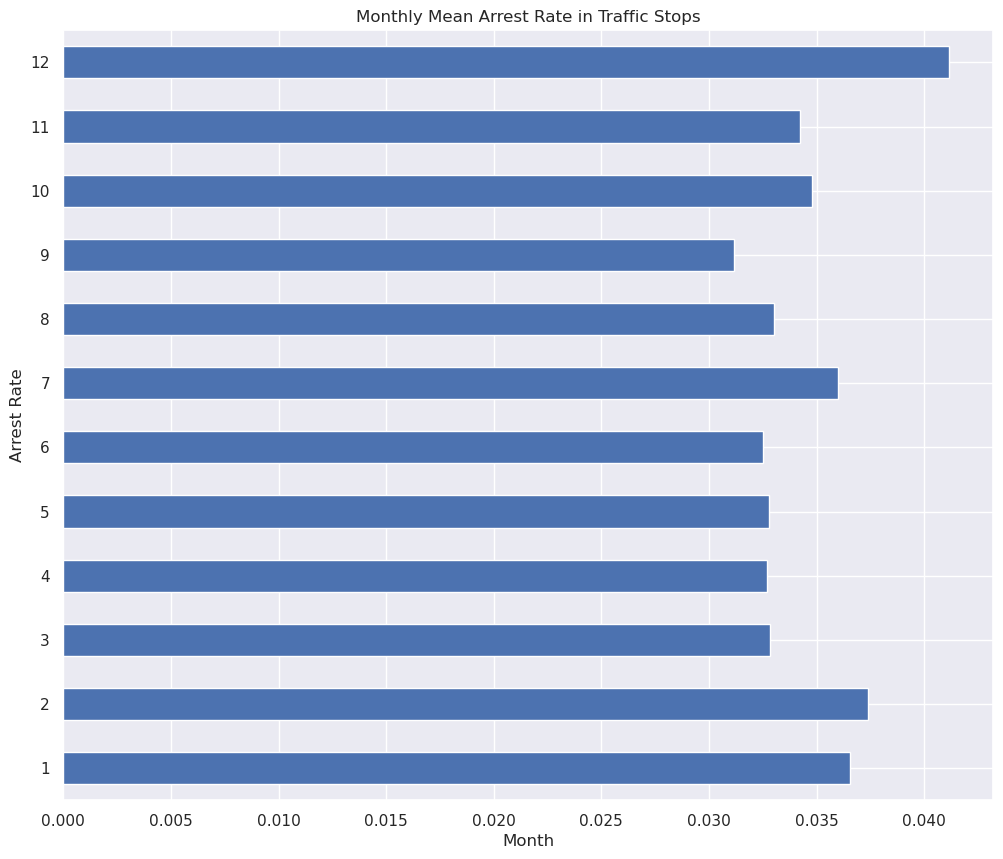

In [33]:
figure = df.groupby(df.index.month).is_arrested.mean().plot(kind='barh')

plt.xlabel('Month')
plt.ylabel('Arrest Rate')
plt.title('Monthly Mean Arrest Rate in Traffic Stops')

plt.savefig('is_arrested_bymonth.pdf', format='pdf')